# Jewellery estimation

Use linear regression to estimate the price of jewellery.

## Dataset definition

A jeweller prices stones on the basis of quality and color. 
- quality estimate values ranges from 0 to 8, with 8 being flawless and 0 containing numerous imperfections
- color values ranges from 1 to 10, with 10 being pure white and 1 being yellow 
 
Based on the price per carat (in hundreds of euros) of the following 11 diamonds  
weighing between 1.0 and 1.5 carats, determine the relationship between quality, color and price.

|Color|Quality|Price/cr|
|:-----:|:--------:|:-------:|
|    7|       5|     65|
|    3|       7|     38|
|    5|       8|     51|
|    8|       1|     38|
|    9|       3|     55|
|    5|       4|     43|
|    4|       0|     25|
|    2|       6|     33|
|    8|       7|     71|
|    6|       4|     51|
|    9|       2|     49|


## Estimation

Estimate the price of the following stones based on Color and Quality:

|Color|Quality|Price/cr|
|:-----:|:--------:|:-------:|
|    8|       5|   xx |
|    1|       0|   xx |
|    1|       8|   xx |
|   10|       0|   xx |
|   10|       8|   xx |

Write down the regression line coefficients and intercepts of the model too.

In [38]:
# step 1: initiate program and read jewellery.csv to pandas df

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("jewellery.csv", delimiter=",")
print(df.describe()); print()
print(df)

           color    quality   price/cr
count  11.000000  11.000000  11.000000
mean    6.000000   4.272727  47.181818
std     2.408319   2.611165  13.629513
min     2.000000   0.000000  25.000000
25%     4.500000   2.500000  38.000000
50%     6.000000   4.000000  49.000000
75%     8.000000   6.500000  53.000000
max     9.000000   8.000000  71.000000

    color  quality  price/cr
0       7        5        65
1       3        7        38
2       5        8        51
3       8        1        38
4       9        3        55
5       5        4        43
6       4        0        25
7       2        6        33
8       8        7        71
9       6        4        51
10      9        2        49


In [39]:
# step 2: make sure data does not have any NaN values
print(f"missing values of variable 'color':  {sum(np.isnan(df["color"]))}")
print(f"missing values of variable 'quality':  {sum(np.isnan(df["color"]))}")
print(f"missing values of variable 'price/cr':  {sum(np.isnan(df["price/cr"]))}")

missing values of variable 'color':  0
missing values of variable 'quality':  0
missing values of variable 'price/cr':  0


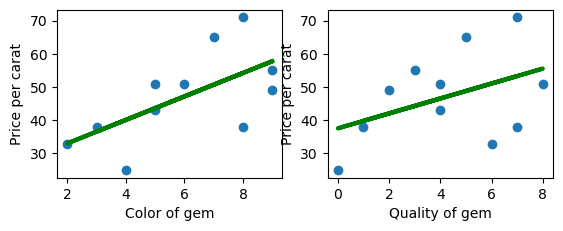

In [40]:
# step 3: draw scatter plots of both variables to get a fast comprehension

from scipy import stats

# create a linear regression function
def linearRegression(data_x_axis, data_y_axis):
    slope, intercept, r, p, std_err = stats.linregress(data_x_axis, data_y_axis)
    return slope * data_x_axis + intercept

# simple linear regression lines for separate predictors
ax1_lm = linearRegression(df["color"], df["price/cr"])
ax2_lm = linearRegression(df["quality"], df["price/cr"])

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.scatter(df["color"], df["price/cr"])
ax1.set_xlabel("Color of gem")
ax1.set_ylabel("Price per carat")
ax1.plot(df["color"], ax1_lm, color="green", linewidth=3)
ax2 = fig.add_subplot(222)
ax2.scatter(df["quality"], df["price/cr"])
ax2.set_xlabel("Quality of gem")
ax2.set_ylabel("Price per carat")
ax2.plot(df["quality"], ax2_lm, color="green", linewidth=3)
plt.show()

In [41]:
# step 4: train a multi linear regression model and print its coefficients and interception
import sklearn
lm = sklearn.linear_model.LinearRegression()

# need more than one [] to pick multiple columns, panda library speciality
lm.fit(df[["color", "quality"]], df["price/cr"])

print(f"color coefficient: {lm.coef_[0]}, quality coefficient: {lm.coef_[1]}")
print(f"interception: {lm.intercept_}")


color coefficient: 4.89528836451137, quality coefficient: 3.7584154829361682
interception: 1.7514036585681438


In [44]:
# step 5: predict values for the sample

sample = pd.DataFrame({
    "color": [8, 1, 1, 10, 10],
    "quality": [5, 0, 8, 0, 8],
    "price/cr": [0, 0, 0, 0, 0]
    })

print(sample); print()

sample["price/cr"] = lm.predict(sample[["color", "quality"]])

print(sample)

   color  quality  price/cr
0      8        5         0
1      1        0         0
2      1        8         0
3     10        0         0
4     10        8         0

   color  quality   price/cr
0      8        5  59.705788
1      1        0   6.646692
2      1        8  36.714016
3     10        0  50.704287
4     10        8  80.771611
